In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Concept and techologies of AI/diabetes_.csv")

In [4]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
missing_data=df.isnull().sum()/len(df) *100
for column in df.columns:
  if missing_data[column]>10:
    df[column].fillna(df[column].mean(),inplace=True)
  else:
    df.dropna(subset=[column],inplace=True)

In [6]:
x=df.drop(columns=['Outcome']).values
y=df['Outcome'].values
def train_test_split(x,y,test_size=0.3,random_seed=42):
  np.random.seed(random_seed)
  indices=np.arange(x.shape[0])
  np.random.shuffle(indices)
  test_split_size=int(len(x)*test_size)
  test_indices=indices[:test_split_size]
  train_indices=indices[test_split_size:]
  x_train=x[train_indices]
  x_test=x[test_indices]
  y_train=y[train_indices]
  y_test=y[test_indices]
  return x_train,x_test,y_train,y_test

In [7]:
def distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

In [8]:
def knn(query, x_train, y_train, k=3):
  distances = [distance(query, x) for x in x_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [9]:
def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

In [10]:
def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

In [11]:
def Scale(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y);
y_predectijon=knn_predict(x_test,x_train,y_train);
accuracy=compute_accuracy(y_test,y_predectijon)
print("Accuracy: ",accuracy)
x_scaled=Scale(x);
x_train_s,x_test_s,y_train_s,y_test_s=train_test_split(x_scaled,y);
y_predectijon_s=knn_predict(x_test_s,x_train_s,y_train_s);
accuracy_s=compute_accuracy(y_test_s,y_predectijon_s)
print("Scaled Accuracy: ",accuracy_s)

Accuracy:  67.3913043478261
Scaled Accuracy:  70.86956521739131


Scaling Usually increses the accuracy.
And the reason to see the change in accuracy is due to the distance.

In [13]:
def knn_k_analysis(x, y, k_values):
    accuracy_values = []
    scaled_accuracy_values = []
    time_values=[]
    scaled_time_values=[]
    for k in k_values:
        start_time=time.time()
        x_train, x_test, y_train, y_test = train_test_split(x, y)
        y_prediction = knn_predict(x_test, x_train, y_train, k)
        accuracy = compute_accuracy(y_test, y_prediction)
        end_time=time.time()
        time_values.append(end_time-start_time)
        accuracy_values.append(accuracy)
        print(f"Accuracy for k={k}: {accuracy}")
        print(f"Time taken for k={k}: {end_time-start_time}")
        print()

        scaled_start_time=time.time()
        x_scaled = Scale(x)
        x_train_s, x_test_s, y_train_s, y_test_s = train_test_split(x_scaled, y)
        y_prediction_s = knn_predict(x_test_s, x_train_s, y_train_s, k)
        scaled_accuracy = compute_accuracy(y_test_s, y_prediction_s)
        scaled_end_time=time.time()
        scaled_time_values.append(scaled_end_time-scaled_start_time)
        scaled_accuracy_values.append(scaled_accuracy)
        print(f"Scaled Accuracy for k={k}: {scaled_accuracy}")
        print(f"Time taken for k={k}: {end_time-start_time}")
        print()

    plt.plot(k_values, accuracy_values, label="Original", marker='o')
    plt.plot(k_values, scaled_accuracy_values, label="Scaled",marker='x')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.plot(k_values, time_values, label="Original", marker='o')
    plt.plot(k_values, scaled_time_values, label="Scaled", marker='x')
    plt.xlabel('k')
    plt.ylabel('Time')
    plt.title('Time taken by KNN with Different Values of k')
    plt.grid(True)
    plt.legend()
    plt.show()
    return accuracy_values, scaled_accuracy_values


Accuracy for k=1: 68.69565217391305
Time taken for k=1: 0.8600924015045166

Scaled Accuracy for k=1: 62.17391304347826
Time taken for k=1: 0.8600924015045166

Accuracy for k=2: 72.60869565217392
Time taken for k=2: 0.8467531204223633

Scaled Accuracy for k=2: 66.95652173913044
Time taken for k=2: 0.8467531204223633

Accuracy for k=3: 67.3913043478261
Time taken for k=3: 0.8507740497589111

Scaled Accuracy for k=3: 70.86956521739131
Time taken for k=3: 0.8507740497589111

Accuracy for k=4: 72.17391304347827
Time taken for k=4: 0.841071605682373

Scaled Accuracy for k=4: 69.1304347826087
Time taken for k=4: 0.841071605682373

Accuracy for k=5: 68.69565217391305
Time taken for k=5: 1.4727976322174072

Scaled Accuracy for k=5: 69.1304347826087
Time taken for k=5: 1.4727976322174072

Accuracy for k=6: 70.0
Time taken for k=6: 1.3092873096466064

Scaled Accuracy for k=6: 68.69565217391305
Time taken for k=6: 1.3092873096466064

Accuracy for k=7: 69.1304347826087
Time taken for k=7: 0.8753621

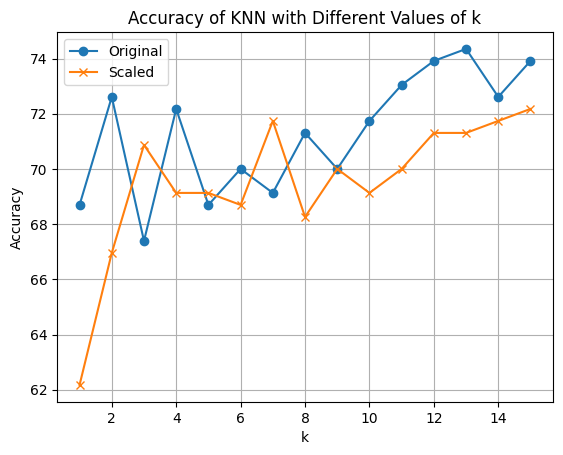

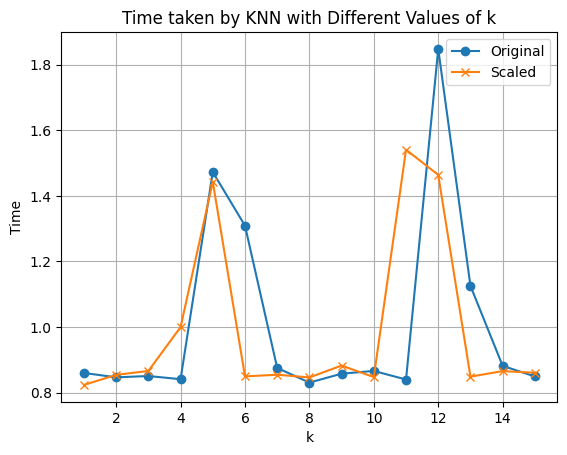

In [14]:
k_values = range(1, 16)
accuracy_values, scaled_accuracy_values = knn_k_analysis(x, y, k_values)

The choise of k affects the accuracy as in small value of k accuracy is unstable whereas when the value of k slightly increases the accuracy is higher and more stable.

The Optimal k is 13 as it gives higher accuracy in less time.

In large datasets, KNN becomes slow and may give poor performance during distance calculations.

To improve efficiency, the data should be scaled so that all features contribute equally to distance computation, and the dataset size should be reduced.